In [6]:
import numpy as np
from scipy.stats import norm, t

import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

import check_lab02 as p

Note: If you download this notebook to edit offline in the computer lab, you will need [this file](https://raw.githubusercontent.com/cooperrc/sensors_and_data/master/ME3263-Lab_02/check_lab02.py) (right click -> save as) in the same directory as the .ipynb file

# ME 3263 - Laboratory #2 

## What is a Strain Gauge?

A strain gauge consists of a looped wire that is embedded in a thin backing. Two
copper coated tabs serve as solder points for the leads. See Figure 1a. The
strain gauge is mounted to the structure, whose deformation is to be measured. As
the structure deforms, the wire stretches (increasing its net length ) and its
electrical resistance changes: $R=\rho L/A$, where $\rho$ is the material
resistivity, $L$ is the total length of the wire, and $A$ is the cross sectional
area of the wire.  Note that as $L$ increases, the cross sectional area changes as
well due to the Poisson contraction; the resistivity also changes.

![Figure 1: a) A typical strain gauge. b) One common setup: the gauge is
mounted to measure the x-direction strain on the top surface. It's
engaged in a quarter bridge configuration of the Wheatstone bridge
circuit.](./figure_01.png)

*Figure 1: a) A typical strain gauge. b) One common setup: the gauge is
mounted to measure the x-direction strain on the top surface. It's
engaged in a quarter bridge configuration of the Wheatstone bridge
circuit.*

# Validating static strain gauge measurements

In this lab we will calibrate strain measurements using Euler-Bernouli beam theory
kinematics \[1\]. The axial strain in a beam is directly proportional to the distance
from the neutral axis and curvature:

$\epsilon_x=-\kappa z$. (1)

Where $\epsilon_x$ is the strain in the material, $z$ is the distance from the neutral axis, and $\kappa$ is the curvature of the beam. $\kappa$ is approximated as the second derivative of the displacement of the center axis:

$\kappa=\frac{d^2 w}{dx^2}$. (2)

Equations 1 and 2 relate beam deflection to axial strain. These are called
kinematic equations because they define the geometry of the beam deflection. 

The Euler-Bernouli beam theory uses Newton's second law (kinetics) and Hooke's
law (constitutive) to derive the linear equations of motion for one dimensional
deformable objects \[1,4\]. The relation between a _static applied force_ $q(x)$ and _static
deflection_ $w(x)$ is:

$\frac{\partial^2}{\partial x^2}\left(EI\frac{\partial^2 w}{\partial
x^2}\right)=q(x)$ (3)

where $E$ is the Young's modulus, $x$ is the distance along the neutral axis,
and $I$ is the second moment of area of the beam's cross-section. For a
rectangular cross-section $b \times t$, width by thickness the second moment of
area is:

$I=\frac{bt^3}{12}$. (4)

We can design our strain gage validation such that $E$ and $I$ are not necessary. A cantilevered (clamped) beam of length $L$ that is deflected by a distance $\delta$ at the free end has the following boundary conditions for its static deflection:

$w(0)=0$, $w'(0)=0$, $w(L)=\delta$, and $w''(L)=0$

Therefore, the functions $w(x)$ and $w''(x)$ can be determined by integrating equation 3 four times and using the four boundary conditions:

$w(x)=-\frac{1}{2}\left(\frac{\delta}{L^3}x^3-3\frac{\delta}{L^2}x^2\right)$ (5a)

and the curvature 

$w''(x)=-\left(3\frac{\delta}{L^3}x-3\frac{\delta}{L^2}\right)$ (5b)

Using equations 1,2, and 5, the only quantities needed to determine strain at a given
location on a linear, homogeneous beam are $z$, $\delta$, and $L$. 
  
Below are two functions that calculate displacement and curvature given a cantilevered beam of length `L` that is deflected by a distance `delta` at its free end.

In [8]:
def disp_at_x(x,L,delta):
    '''returns the displacement w(x) given the position, x, 
    length of bar, L, and displacement at L, delta'''
    wx=-1/2*(delta/L**3*x**3-3*delta/L**2*x**2)
    return wx

def k_at_x(x,L,delta):
    '''returns the curvature w''(x) given the position, x, 
    length of bar, L, and displacement at L, delta'''
    wx=-(3*delta/L**3*x-3*delta/L**2)
    return wx


In [9]:
w20mm=disp_at_x(20,400,10)
k20mm=k_at_x(20,400,10)
print('displacement of 400 mm bar deflected 10 mm, 20 mm from support =%1.3f mm'%w20mm)
print('   curvature of 400 mm bar deflected 10 mm, 20 mm from support =%1.3f 1/m'%(k20mm*1000))

displacement of 400 mm bar deflected 10 mm, 20 mm from support =0.037 mm
   curvature of 400 mm bar deflected 10 mm, 20 mm from support =0.178 1/m


### Example Problem 1

If your beam is 400 mm long by 10 mm thick and it deflects 15 mm at the tip, determine the following:

a. displacement of the beam 20 mm from the base. Save as `w20`

b. the curvature of the beam 20 mm from the base. Save as `k20`  

c. the strain of the beam 20 mm from the base. Save as `e20` 

In [2]:
# your work here

p.check_p01(w20,k20,e20)

NameError: name 'w20' is not defined

## Visualizing deflection and curvature

We can use the above expressions for $w$ and $w''$ to plot the deflection and curvature of a cantilevered beam:

Text(0.5, 1.0, 'Shape of deflected cantilever beam')

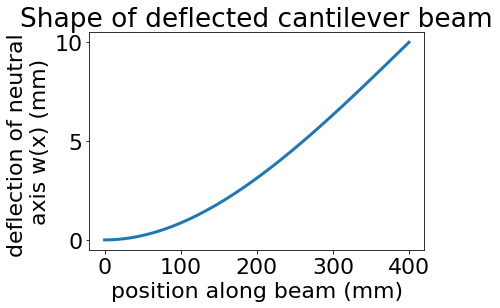

In [10]:
x=np.linspace(0,400)
wx=disp_at_x(x,400,10)
plt.plot(x,wx)
plt.xlabel('position along beam (mm)')
plt.ylabel('deflection of neutral \naxis w(x) (mm)')
plt.title('Shape of deflected cantilever beam')

Text(0.5, 1.0, 'Curvature of deflected cantilever beam')

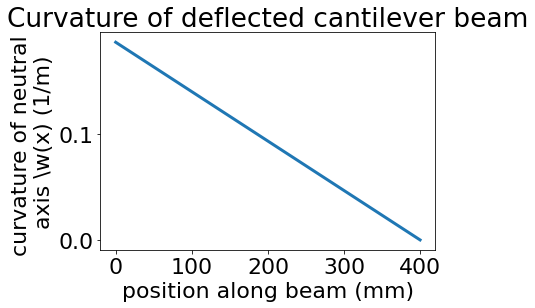

In [11]:
x=np.linspace(0,400)
kx=k_at_x(x,400,10)
plt.plot(x,kx*1000)
plt.xlabel('position along beam (mm)')
plt.ylabel('curvature of neutral \naxis \\w(x) (1/m)')
plt.title('Curvature of deflected cantilever beam')

### Example Problem 2

If your beam is 400 mm long by 10 mm thick and it deflects 15 mm at the tip, determine the position along the beam for the following:

a. Where is the maximum deflection in the beam? save as `x_max_defl`

b. Where is the maximum curvature in the beam? save as `x_max_curv`

c. Where is the maximum strain in the beam? save as `x_max_strain`

In [3]:
#your work here

p.check_p02(x_max_defl,x_max_curv,x_max_strain)

NameError: name 'x_max_defl' is not defined

# Task 1: Validate Strain Gauge Measurements

![Figure 2: Diagram of the validation process. The strain gage is placed at a distance $x_{SG}$ from the cantilever support. A linear-elastic beam of length $L$ is deflected by distance, $\delta$.](https://raw.githubusercontent.com/cooperrc/sensors_and_data/master/ME3263-Lab_02/figure_02.png)

*Figure 2: Diagram of the validation process. The strain gauge is placed at a distance $x_{SG}$ from the cantilever support. A linear-elastic beam of length $L$ is deflected by distance, $\delta$.*

-   Apply a known tip displacement  as seen in Figure 2.  

-   Measure and record the strain at your strain gage location, the displacement, $\delta$, and position where load was applied,
    $L$.

-   Calculate the strain at the location of the strain gage using equations 1,2,
    and 5a-b.
    
-   Compare the calculated and measured strain values    

# Measuring constitutive properties

## Constitutive Model
Now that the strain gauge has been calibrated, we can use it to determine constitutive properties of our workpiece. Using measurements of strain, we wish to determine the Young's modulus of the beam, $E$. This measurement requires three components: kinematic (the geometric equations solved in the validation), kinetic ($\sum{F}=0$), and a constitutive model (Hooke's Law). The constitutive equation for a linear-elastic beam subject to an applied moment is:

$M=EI\kappa$. (6)

where $M$ is the applied moment, $E$ is the Young's modulus, $I$ is the second moment of inertia of the area of the beam, and $\kappa$ is the curvature of the beam. The constant $I$ is based upon the geometry from equation 4 ($I=\frac{bt^3}{12}$). The material constant $E$ is unknown. 

# Task 2: Collect Data for a Constitutive Model

![Figure 3: A linear-elastic beam of length $L$ has a force applied at distance, $r$. 
The strain gauge is placed at a distance $x_{SG}$ from the cantilever support.](https://raw.githubusercontent.com/cooperrc/sensors_and_data/master/ME3263-Lab_02/figure_03.png)

*Figure 3: A linear-elastic beam of length $L$ has a force applied at distance, $r$. 
The strain gauge is placed at a distance $x$ from the cantilever support.*

- Measure and record the length, width, and thickness of your beam for use in calculating the second moment of area. Remember that your ruler can only record to the millimeter, and your calipers to the hundredth of a millimeter.

- There are notches cut into your beam. Use them to attach varying weights to apply forces at varying distances, $r$, from the support (as seen in Figure 3). Increasing the weight or the distance at which the weight is applied will increase the applied moment. 

- Record the trial no., strain, force, distance, and moment for each combination of weight and distance. Use at least two trials per measurement. 


# Fitting your data to your model

Once you have collected a number of data points for $\kappa$ and $M$, you can use a linear regression to determine the slope of the data. The constitutive model in equation (6) predicts that the moment and curvature will be related by a proportional constant, $EI$. If we know $EI$, the total squared error is as such

$SSE=\sum_i^N{(M_i-EI\kappa_i)^2}$ (7)

where SSE is the sum of squares error between the predicted moment and measured moment for the $i^{th}$ measurement with $N$ total measurements [\[2\]](https://www.amazon.com/Numerical-Methods-Engineers-Steven-Chapra/dp/0073401064). We can choose a of $EI$ that minimizes $SSE$, but it will never be zero. Below is an example calculation for a linear least squares regression in python for a beam with cross-section $12\times3$ mm.

In [13]:
k=np.array([6.95685737e-07, 9.93992373e-06, 3.25200211e-05, 3.55750721e-05,
       5.32023782e-05, 7.48128585e-05, 7.61625461e-05, 8.54476229e-05,
       1.02089509e-04, 1.02841452e-04, 1.32351731e-04, 1.43996022e-04,
       1.45204793e-04, 1.56867759e-04, 1.73435915e-04, 1.95625232e-04,
       2.00670618e-04, 2.12900332e-04, 2.24582886e-04, 2.41141396e-04,
       2.45991618e-04, 2.55608426e-04, 2.76117673e-04, 2.96128593e-04,
       3.07157389e-04, 3.20509718e-04, 3.20363196e-04, 3.35535814e-04,
       3.53706984e-04, 3.64130433e-04])
M=np.array([ 0.        ,  23.82866379,  47.65732759,  71.48599138,
        95.31465517, 119.14331897, 142.97198276, 166.80064655,
       190.62931034, 214.45797414, 238.28663793, 262.11530172,
       285.94396552, 309.77262931, 333.6012931 , 357.4299569 ,
       381.25862069, 405.08728448, 428.91594828, 452.74461207,
       476.57327586, 500.40193966, 524.23060345, 548.05926724,
       571.88793103, 595.71659483, 619.54525862, 643.37392241,
       667.20258621, 691.03125   ])

Best fit for Young's Modulus is 70.2 +/- 0.3 GPa


Text(0, 0.5, 'Moment (N-mm)')

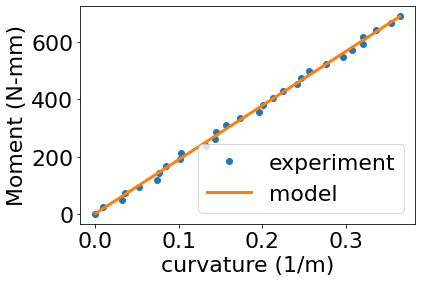

In [14]:
from scipy.optimize import curve_fit

def func(x,EI):
    return EI*x

EI,pcov=curve_fit(func, k, M)
EI_error=np.sqrt(pcov[0,0])
I=12*3**3/12.0
print("Best fit for Young's Modulus is %1.1f +/- %1.1f GPa"%(EI/I*1e-3,EI_error/I*1e-3))

plt.plot(k*1e3,M,'o',label='experiment')
plt.plot(k*1e3,func(k,EI),label='model')
plt.legend()
plt.xlabel('curvature (1/m)')
plt.ylabel('Moment (N-mm)')

*Note:*

The least-squares method used above can be used to fit any function to a data set. You would just need to update the `func` definition to return the desired function based upon your unkown fitting constants. 

The outout `popt` is the covariance matrix [\[3\]](./least_squares-error_with_covariance.pdf). In practice, we can use the square root of the diagonal terms to estimate the error in our least-squares fit. We make a few assumptions when performing this best-fit:

1. There is a random error in the measured  dependent variable (here the moment $M$). 

2. There is no error in the reported independent variable (here the curvature $\kappa$).

3. The measured dependent variables are uncorrelated with the measured error

4. The random error has a mean of zero

We can test assumption 4 by plotting the "residuals" of the fit i.e. the error. The plot below demonstrates that our data has a mean error of 0 and is uncorrelated with the random error. 

Our best-fit model has removed _systematic uncertainty_, but it cannot account for _random uncertainty._

Text(0,0.5,'Error=$M-EI\\kappa$')

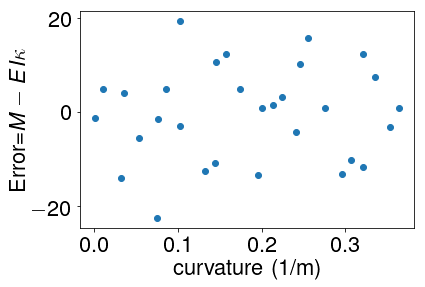

In [25]:
plt.plot(k*1e3,M-func(k,EI),'o')
plt.xlabel('curvature (1/m)')
plt.ylabel(r'Error=$M-EI\kappa$')

# Task 3: Determine Young's Modulus

- Using a linear least squares regression, determine the Young's modulus, $E$, of your beam

# Propagation of Error

If the physical quantities involved in the calculation (e.g., the thickness of the beam) are not measured properly, you can have large systematic errors in your results. 

## Example Problem 3

In the example E calculation above, the width of the beam was 12 mm and the thickness of the beam was 3 mm. On the line, 

`I = 12*3**3/12.0`

Change the thickness to 3.1 mm and calculate $E$. Save the value as `E31`


In [4]:
# Your work here

p.check_p03(E31)

NameError: name 'E31' is not defined

# Task 4: Determine the uncertainty in your estimate of Young's modulus

Each measurement you have taken over the course of this lab has its own associated uncertainty, and that uncertainty propagates through any calculated quantities. Your calculations of moment of inertia from geometry of the beam: $I=\frac{bt^3}{12}$, curvature from strain: $\kappa=-\frac{\epsilon}{z}$, and moment from applied mass: $M=rF$ all possess uncertainties due to the measured quantities involved in their calculation.

- Using the method we learned in class for calculating propagation of error, determine the uncertainties in $I$, $\kappa$, and $M$. With these uncertainties, calculate the uncertainty in $E$ obtained by the expression $E=\frac{M}{I\kappa}$.

- Alternatively, substitute the experssions for $I$, $\kappa$, and $M$ in to $E=\frac{M}{I\kappa}$, then take the partial derivatives of $E=f(b,t,r,\epsilon$) to find the overall sensitivity to each variable.

- To estimate the overall uncertainty in the experiment, it is acceptable to use the means of all measured values in the calculation - the mean of $r$, the mean of $\epsilon$, etc.

- The uncertainties in your measurements of length can be assumed to be zero-order. In other words, consider only the errors due to instrument resolution: $u_{xi}=\frac{resolution}{2}$.

- The uncertainty in your strain measurements can be estimated in two ways for this lab. They will give different results, but both will work for our purposes. First, you may record the "drift" value of your strain gauge after all measurements have been taken. This is the readout of the strain gauge in Lab View when the beam is under no applied moment. Second, you may use the difference between calculated and measured strain from your calibration in Task 1.

- Assume the applied mass is known perfectly - i.e., there is no uncertainty to the force applied to the beam.

## Your Report 

Describe and discuss the results you obtained for the measurement of $E$.

Follow the established format for lab reports: Introduction, Methods, Results & Discussion, Conclusion


### References

References

0. Sutton, M. A., Orteu, J. J., & Schreier, H. (2009). Image correlation for shape, motion and deformation measurements: basic concepts, theory and applications. Springer Science & Business Media.

1. F.P. Beer and E.R. Johnson, Mechanics of Materials, 2nd Edition,
McGraw-Hill, 1992.

2. S. Chapra, Numerical Methods for Engineers, ch. 14-15, 6th Edition, McGraw-Hill, 2009.

3. [C. Salter, Error Analysis Using the Variance–Covariance Matrix, J. of Chem. Ed., 2000.](./least_squares-error_with_covariance.pdf)

3. [Euler-Bernoulli Beam Theory - Wikipedia](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory) 

4. [Uncertainty
Notes courses.washington.edu](https://courses.washington.edu/phys431/uncertainty_notes.pdf)